# 5. 데이터 전처리

앞서 데이터 전처리 과정 수행을 위해 시각화와 연계하여 데이터를 확인해야 한다고 하였습니다. 이번 장에서는 이전 확인하였던 olist 구매기록 데이터를 통해 데이터 전처리를 수행하도록 하겠습니다.

🔗 **한국어 패치 다운로드**

- 💾 [Korea matplotlib]()
- 💾 [나눔고딕 폰트]()

💬 **Chat Prompt**

> 가상환경에 한국어를 사용할 수 있도록 whl 파일과 ttf 파일을 제공하였으니, 아래 과정을 수행하며 한국어 환경 설정 수행
>
> - Code interpreter로 제공한 파일들을 다운로드 및 수행
> - 가상환경에 설치 및 한국어를 사용할 수 있도록 설정
> - 설치 완료후 테스트 그래프 제시
> - 모든 설명은 한국어로 진행

🤖 **GPT 출력: Code**

In [2]:
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt

# 폰트 파일 경로
font_path = '/Users/sigi/sigirace.github.io/_posts/kang_lecture/gpt_ada/data/NanumBarunGothic.ttf'

# 폰트 등록
fm.fontManager.addfont(font_path)

# 한글 폰트 설정
plt.rc('font', family='NanumBarunGothic')

🧑‍💻: 앞서 저장하였던 데이터를 GPT에 업로드 해주세요!

💬 **Chat Prompt**

> 제시한 데이터는 이커머스회사 olist의 구매기록 데이터이다. 이 데이터의 컬럼을 살펴보고 설명해라. <br>
> 단, 모든 과정에서 설명시 한국어를 사용하고, ace_tools는 사용하지 말아라

🤖 **GPT 출력: Message**

✏️ 붙여넣기

🤖 **GPT 출력: Code**

In [3]:
import pandas as pd

# 데이터 불러오기
file_path = './data/olist_order_dataset_processed.csv'
data = pd.read_csv(file_path)

# 데이터의 컬럼을 살펴보기
columns_info = data.columns
columns_info

Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'product_category', 'payment_method', 'installments', 'item_price_usd',
       'shipping_cost_usd', 'installment_divide', 'monthly_price'],
      dtype='object')

🧑‍💻: 실습을 위해 앞서 데이터프레임에 함수를 적용하여 생성하였던 변수 2개를 삭제하겠습니다.

💬 **Chat Prompt**
> installment_divide, monthly_price 두 컬럼은 삭제해줘

🤖 **GPT 출력: Message**

✏️ 붙여넣기

🤖 **GPT 출력: Code**

In [4]:
# 'installment_divide', 'monthly_price' 컬럼 삭제
data = data.drop(columns=['installment_divide', 'monthly_price'])

# 삭제 후 컬럼 목록 확인
data.columns

Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'product_category', 'payment_method', 'installments', 'item_price_usd',
       'shipping_cost_usd'],
      dtype='object')

## 1. 결측치 탐색 및 처리

데이터를 적재, 수집하는 과정에서 결측치가 발생할 수 있습니다. 결측치는 데이터 분석시 오류를 발생시키는 주요 원인이기 때문에 전처리 과정을 거쳐야 합니다.

### 1.1 결측치 탐색

💬 **Chat Prompt**
> 데이터 셋에서 결측치를 확인해주고 컬럼별 결측치의 비율을 알려줘

🤖 **GPT 출력: Message**

✏️ 붙여넣기

🤖 **GPT 출력: Code**

In [6]:
# 각 컬럼별 결측치 개수 확인
missing_data = data.isnull().sum()

# 각 컬럼별 결측치 비율 계산
missing_data_percentage = (missing_data / len(data)) * 100

# 결측치 개수와 비율을 데이터프레임으로 정리
missing_data_summary = pd.DataFrame({
    '결측치 개수': missing_data,
    '결측치 비율 (%)': missing_data_percentage
})

print(missing_data_summary)

                          결측치 개수  결측치 비율 (%)
order_id                       0    0.000000
customer_id                    0    0.000000
order_status                   0    0.000000
order_purchase_timestamp       0    0.000000
product_category               0    0.000000
payment_method                 0    0.000000
installments                   0    0.000000
item_price_usd                99    9.929789
shipping_cost_usd             99    9.929789


💬 **Chat Prompt**
> shipping_cost_usd 컬럼의 결측치는 삭제해줘

🤖 **GPT 출력: Message**

✏️ 붙여넣기

🤖 **GPT 출력: Code**

In [7]:
# shipping_cost_usd 컬럼에서 결측치가 있는 행을 삭제
data_cleaned = data.dropna(subset=['shipping_cost_usd'])

# 삭제 후 데이터프레임의 크기 확인
data_cleaned.shape

(898, 9)

💬 **Chat Prompt**
> item_price_usd의 결측치는 평균으로 대체해줘

🤖 **GPT 출력: Message**

✏️ 붙여넣기

🤖 **GPT 출력: Code**

In [8]:
# item_price_usd 컬럼의 결측치를 평균 값으로 대체
mean_item_price = data_cleaned['item_price_usd'].mean()
data_cleaned['item_price_usd'].fillna(mean_item_price, inplace=True)

# 결측치 대체 후 결측치 확인
data_cleaned['item_price_usd'].isnull().sum()

/var/folders/4r/gj4j8ny95v9bfz63ty96fm280000gn/T/ipykernel_94967/1189164055.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['item_price_usd'].fillna(mean_item_price, inplace=True)


0

***

## 2. 이상치 탐색 및 처리

결측치가 발생하는 것과 동일한 이유로 이상치가 발생할 수 있습니다. 이상치는 데이터 분석시 해석의 신뢰성을 떨어뜨리는 주요 원인이기 때문에 전처리 과정을 거쳐야 합니다.

📍 **이상치의 종류**

<p align="center"><img src="https://github.com/sigirace/page-images/blob/main/kang_lectures/python_preprocessing/outlier_type.png?raw=true" width="400" height="200"></p>

- 이상치는 측정의 변동성, 실험의 오류, 측정 장비의 이상 등으로 발생할 수 있음
- 이상치는 분석 모델의 성능을 떨어뜨리거나 분석 결과에 악영향을 줄 수 있음 ☞ 제거 혹은 처리 필요

### 2.1 이상치 탐색

🧑‍💻: 먼저 데이터의 요약 통계 정보를 통해 이상치를 확인 해보겠습니다.

💬 **Chat Prompt**
> 제시한 데이터의 요약 통계 정보를 통해 이상치가 있는지 확인해줘

🤖 **GPT 출력: Message**

✏️ 붙여넣기

🤖 **GPT 출력: Code**

In [4]:
# 데이터의 요약 통계 정보 확인
summary_stats = data.describe()

# 요약 통계 정보 출력
print(summary_stats)

       installments  item_price_usd  shipping_cost_usd
count    997.000000      898.000000         898.000000
mean       3.623872       29.099161         115.493469
std       31.681427      333.614822        3336.873052
min        0.000000        1.805000          -9.595000
25%        1.000000       13.110000           2.464300
50%        1.000000       17.098100           3.064700
75%        4.000000       20.898100           5.169425
max      999.000000     9999.000000       99999.000000


🧑‍💻: 이를 좀 더 시각화하여 판단하기 쉽도록 해보겠습니다.

💬 **Chat Prompt**


> 수치형 컬럼들에 대해서 개별적으로 box plot 시각화 수행
> 단, box plot은 개별적으로 수행하 되, 하나의 그리드에 표현


🤖 **GPT 출력: Message**

✏️ 붙여넣기

🤖 **GPT 출력: Code**

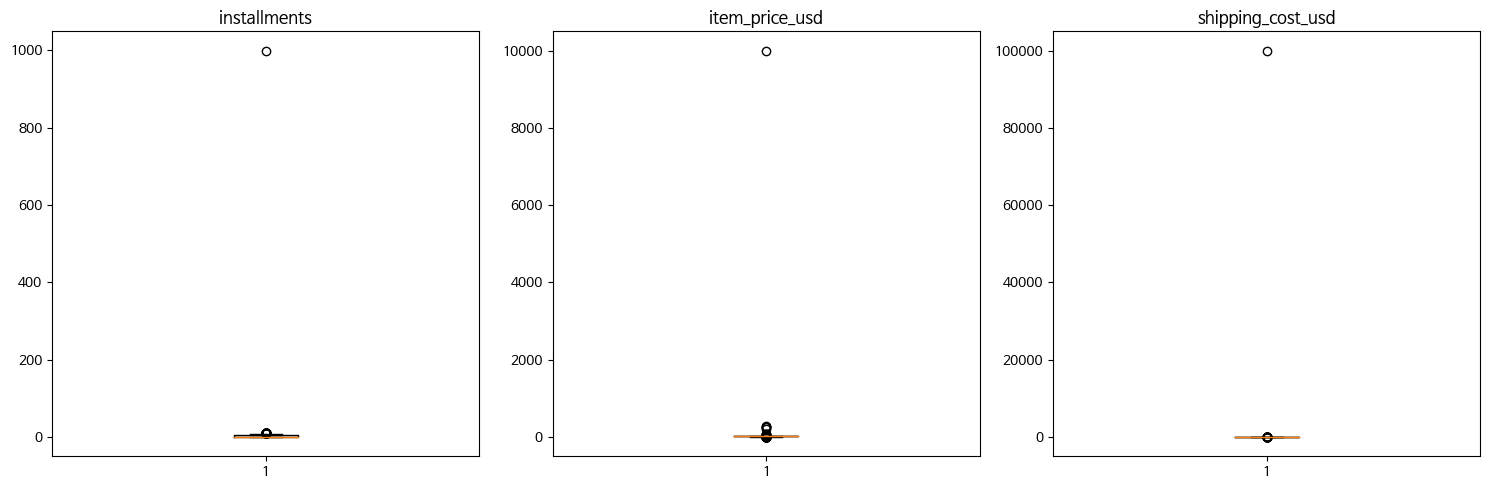

In [9]:
import matplotlib.pyplot as plt

# 수치형 컬럼들 선택
numeric_columns = ['installments', 'item_price_usd', 'shipping_cost_usd']

# Box plot 그리기
plt.figure(figsize=(15, 5))

for i, column in enumerate(numeric_columns, 1):
    plt.subplot(1, 3, i)
    plt.boxplot(data_cleaned[column])
    plt.title(column)

plt.tight_layout()
plt.show()

🧑‍💻: 극단적인 값이 있어 데이터를 파악하기 어려워 보입니다. 상위, 하위 3% 정도 제거하고 데이터를 확인해보겠습니다.

💬 **Chat Prompt**

> 제시한 데이터에서 각 컬럼별 상위, 하위 3% 정도 극단적인 값들을 제거해줘

🤖 **GPT 출력: Message**

✏️ 붙여넣기

🤖 **GPT 출력: Code**

In [10]:
# 각 컬럼별 상위, 하위 3% 극단적인 값들을 제거
def remove_extreme_values(df, column, lower_percentile=0.03, upper_percentile=0.97):
    lower_bound = df[column].quantile(lower_percentile)
    upper_bound = df[column].quantile(upper_percentile)
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# 수치형 컬럼에 대해 극단적인 값 제거
for column in numeric_columns:
    data_cleaned = remove_extreme_values(data_cleaned, column)

# 결과 데이터의 크기 확인
print(data_cleaned.describe())

       installments  item_price_usd  shipping_cost_usd
count    812.000000      812.000000         812.000000
mean       2.695813       18.040812           3.925428
std        2.849679        7.608777           2.072846
min        0.000000        3.781000           1.485800
25%        1.000000       15.198100           2.601100
50%        1.000000       17.098100           3.101750
75%        4.000000       22.420000           5.116225
max       10.000000       34.008100           9.688100


💬 **Chat Prompt**
> 수치형 컬럼들에 대해서 개별적으로 box plot 시각화 수행
>
> 단, box plot은 개별적으로 수행하 되, 하나의 그리드에 표현

🤖 **GPT 출력: Message**

✏️ 붙여넣기

🤖 **GPT 출력: Code**

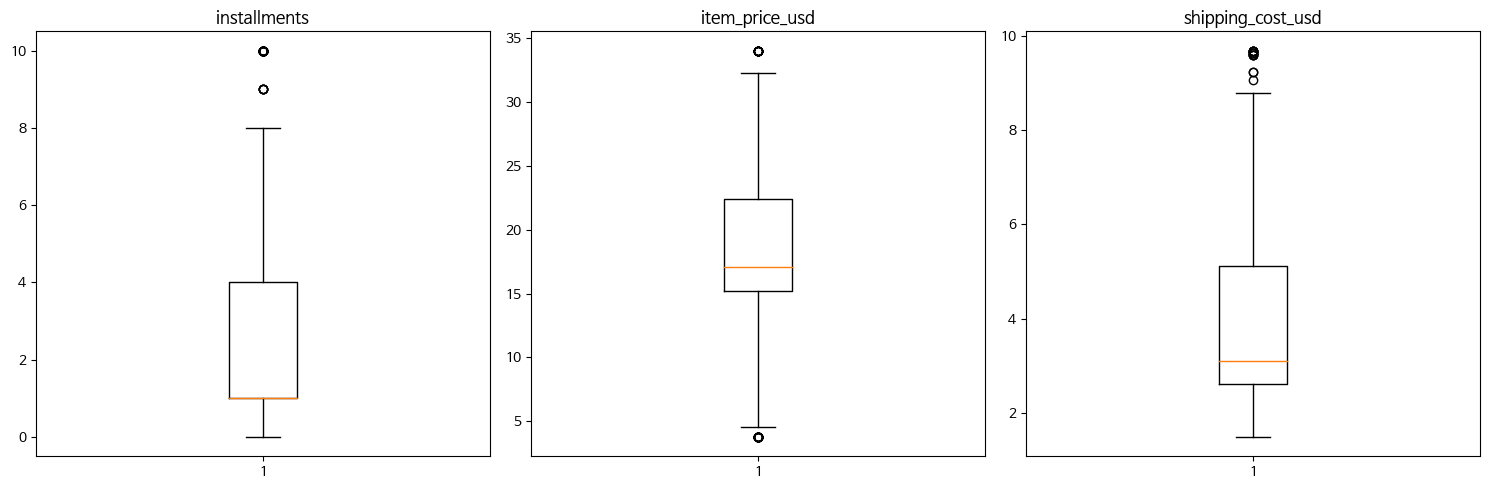

In [11]:
# 극단적인 값 제거 후 수치형 컬럼들에 대한 Box Plot 시각화
plt.figure(figsize=(15, 5))

for i, column in enumerate(numeric_columns, 1):
    plt.subplot(1, 3, i)
    plt.boxplot(data_cleaned[column])
    plt.title(column)

plt.tight_layout()
plt.show()

🧑‍💻: 다른 변수에 비해 shipping_cost_usd에 outlier가 많은 것으로 보입니다. 이를 IQR 방식을 통해 제거해보겠습니다.

💬 **Chat Prompt**
> shipping_cost_usd 컬럼에 대해 IQR 방식으로 이상치를 탐색해줘

🤖 **GPT 출력: Message**

✏️ 붙여넣기

🤖 **GPT 출력: Code**

In [12]:
# IQR 방식으로 이상치 탐색
Q1 = data_cleaned['shipping_cost_usd'].quantile(0.25)
Q3 = data_cleaned['shipping_cost_usd'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# 이상치 탐색
outliers = data_cleaned[(data_cleaned['shipping_cost_usd'] < lower_bound) | (data_cleaned['shipping_cost_usd'] > upper_bound)]

# 이상치 비율 계산
outliers_ratio = len(outliers) / len(data_cleaned) * 100

lower_bound, upper_bound, outliers_ratio

(-1.1715874999999998, 8.8889125, 2.0935960591133003)

### 2.2 이상치 처리

이상치를 탐색한 후 처리는 데이터 분석가가 도메인 전문가와 협의를 통해 수행하여야 합니다. 본 실습에서는 다양한 처리 방법을 학습하기 위해 임의로 진행하도록 하겠습니다.

🧑‍💻: 이상치로 제거되는 비율이 많기에 상한값 이상은 대체하고 하한값 이하는 제거하도록 하겠습니다.

💬 **Chat Prompt**
> shipping_cost_usd 컬럼에서 하한값 미만은 제거해줘

🤖 **GPT 출력: Message**

✏️ 붙여넣기

🤖 **GPT 출력: Code**

In [14]:
# shipping_cost_usd 컬럼에서 하한값 미만인 데이터를 제거
data_cleaned = data_cleaned[data_cleaned['shipping_cost_usd'] >= lower_bound]

# 제거 후 데이터셋의 크기 확인
print(data_cleaned.describe())

       installments  item_price_usd  shipping_cost_usd
count    812.000000      812.000000         812.000000
mean       2.695813       18.040812           3.925428
std        2.849679        7.608777           2.072846
min        0.000000        3.781000           1.485800
25%        1.000000       15.198100           2.601100
50%        1.000000       17.098100           3.101750
75%        4.000000       22.420000           5.116225
max       10.000000       34.008100           9.688100


💬 **Chat Prompt**
> shipping_cost_usd 컬럼에서 상한값 초과는 상한값으로 대체해줘

🤖 **GPT 출력: Message**

✏️ 붙여넣기

🤖 **GPT 출력: Code**

In [16]:
# shipping_cost_usd 컬럼에서 상한값 초과하는 데이터를 상한값으로 대체
data_cleaned['shipping_cost_usd'] = data_cleaned['shipping_cost_usd'].apply(
    lambda x: upper_bound if x > upper_bound else x
)

# 상한값 초과 데이터 대체 후 데이터 확인
print(data_cleaned.describe())

       installments  item_price_usd  shipping_cost_usd
count    812.000000      812.000000         812.000000
mean       2.695813       18.040812           3.911310
std        2.849679        7.608777           2.036154
min        0.000000        3.781000           1.485800
25%        1.000000       15.198100           2.601100
50%        1.000000       17.098100           3.101750
75%        4.000000       22.420000           5.116225
max       10.000000       34.008100           8.888912


🧑‍💻: 결측치와 이상치의 처리 결과를 확인해보겠습니다.


💬 **Chat Prompt**

> 결측치 처리와 이상치 처리 결과를 요약해줘

🤖 **GPT 출력: Message**

✏️ 붙여넣기

***

## 3. Feature Engineering

Feature Engineering은 데이터 분석 및 머신러닝 모델링 과정에서 매우 중요한 단계로, 데이터를 바탕으로 새로운 특성(변수)을 생성하거나 기존 특성을 변형하여 분석의 성능을 향상시키는 과정을 말합니다.

📍**Feature Engineering의 주요 활동**

- **기존 특성 조합**: 여러 특성을 조합하여 새로운 특성을 만듭니다. 예를 들어, 가격과 수량을 곱하여 총 금액(total amount) 특성을 생성할 수 있습니다.
- **날짜/시간 특성 변환**: 날짜 및 시간을 연도, 월, 요일, 시간 등으로 변환해 모델에 유용한 정보를 추가합니다.
- **비율 계산**: 두 특성 간의 비율을 계산하여 새로운 특성을 만듭니다. 예를 들어, 매출과 비용을 이용해 이익률을 생성할 수 있습니다.

### 3.1 날짜 파생변수 생성

날짜는 Feature Engineering에서 가장 쉽게 사용할 수 있는 데이터입니다. 주말, 주중, 오전, 오후, 공휴일 등 만들어 낼 수 있는 경우의 수가 매우 많기 때문입니다. 따라서 분석하고자 하는 도메인에 맞추어 이를 활용하는 것을 추천드립니다.

💬 **Chat Prompt**

> is_weekend 컬럼을 생성하고 이 값은 order_purchase_timestamp를 통해 주중, 주말로 분리하여 지정해줘

🤖 **GPT 출력: Message**

✏️ 붙여넣기

🤖 **GPT 출력: Code**

In [21]:
# order_purchase_timestamp 컬럼을 datetime 형식으로 변환
data_cleaned['order_purchase_timestamp'] = pd.to_datetime(data_cleaned['order_purchase_timestamp'])

# is_weekend 컬럼 생성 (주말이면 True, 주중이면 False)
data_cleaned['is_weekend'] = data_cleaned['order_purchase_timestamp'].dt.dayofweek >= 5

# 생성된 is_weekend 컬럼 확인
print(data_cleaned[['order_purchase_timestamp', 'is_weekend']].head())

  order_purchase_timestamp  is_weekend
0      2017-01-23 18:29:00       False
1      2017-01-30 10:47:00       False
2      2017-01-31 17:40:00       False
3      2017-10-01 20:04:00        True
4      2017-10-01 09:15:00        True


💬 **Chat Prompt**
> is_weekend을 막대 그래프로 시각화해줘

🤖 **GPT 출력: Message**

✏️ 붙여넣기

🤖 **GPT 출력: Code**

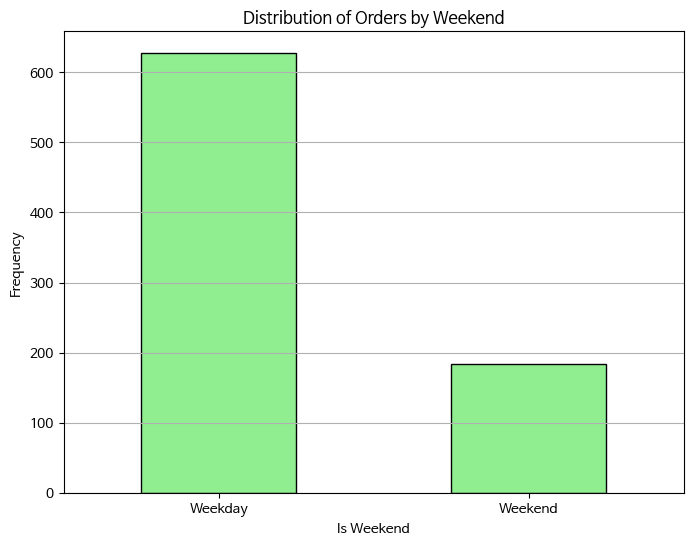

In [27]:
# is_weekend 컬럼의 분포를 막대그래프로 시각화
plt.figure(figsize=(8, 6))
data_cleaned['is_weekend'].value_counts().plot(kind='bar', color='lightgreen', edgecolor='black')
plt.title('Distribution of Orders by Weekend')
plt.xlabel('Is Weekend')
plt.ylabel('Frequency')
plt.xticks(ticks=[0, 1], labels=['Weekday', 'Weekend'], rotation=0)
plt.grid(axis='y')
plt.show()

### 3.2 추가 파생변수 생성

🧑‍💻: 일단 추가 파생변수를 만들어 놓으면 손해는 보지 않습니다. 데이터 분석의 목적과 방법이 명확치 않으면 GPT를 이용하는 것도 아주 좋은 방법입니다.

💬 **Chat Prompt**

> 데이터를 보고 추가할 수 있는 파생변수를 제안해줘

🤖 **GPT 출력: Message**

✏️ 붙여넣기

🧑‍💻: 할부 유형을 구분하여 향후 분석에 활용하는 것도 좋은 아이디어일 것 같습니다. 분포를 통해 먼저 데이터를 살펴보겠습니다.

💬 **Chat Prompt**
> installments의 분포를 시각화해줘

🤖 **GPT 출력: Message**

✏️ 붙여넣기

🤖 **GPT 출력: Code**

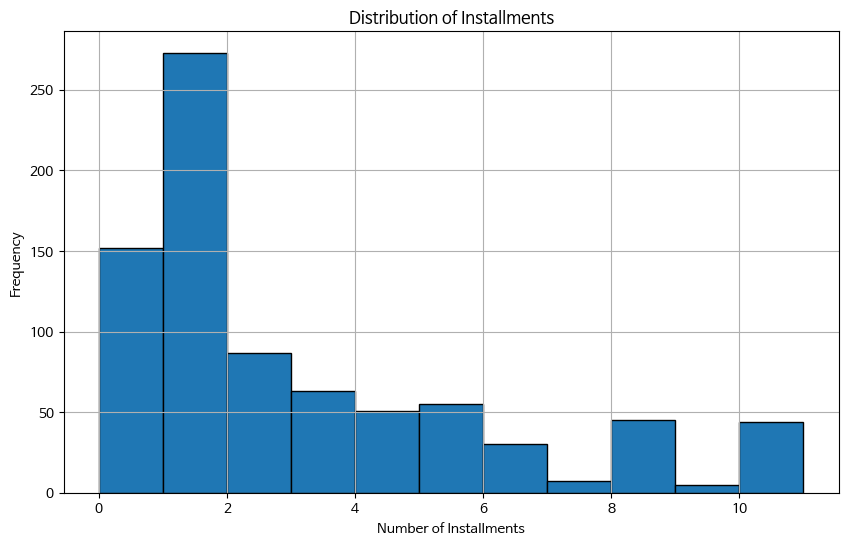

In [24]:
import matplotlib.pyplot as plt

# installments 컬럼의 분포 시각화
plt.figure(figsize=(10, 6))
plt.hist(data_cleaned['installments'], bins=range(int(data_cleaned['installments'].min()), int(data_cleaned['installments'].max()) + 2), edgecolor='black')
plt.title('Distribution of Installments')
plt.xlabel('Number of Installments')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

🧑‍💻: 할부 개월수에 따라 유형을 3등분하여 0:일시불, 1~3:일반, 4~: 장기 로 구분하도록 하겠습니다.


💬 **Chat Prompt**

> 할부 개월수에 따라 유형을 구분하는 컬럼을 생성해줘
> - 0개월: 일시불
> - 1~3개월: 단기
> - 4개월~: 장기

🤖 **GPT 출력: Message**

✏️ 붙여넣기

🤖 **GPT 출력: Code**

In [25]:
# 'installment_duration_type' 컬럼 생성: 할부 개월수에 따라 유형 구분
def categorize_installments(installments):
    if installments == 0:
        return '일시불'
    elif 1 <= installments <= 3:
        return '단기'
    else:
        return '장기'

data_cleaned['installment_duration_type'] = data_cleaned['installments'].apply(categorize_installments)

# 새로운 컬럼 확인
print(data_cleaned[['installments', 'installment_duration_type']].head())

   installments installment_duration_type
0             0                       일시불
1             0                       일시불
2             1                        단기
3             1                        단기
4             1                        단기


💬 **Chat Prompt**
> installment_duration_type을 막대그래프로 시각화해줘

🤖 **GPT 출력: Message**

✏️ 붙여넣기

🤖 **GPT 출력: Code**

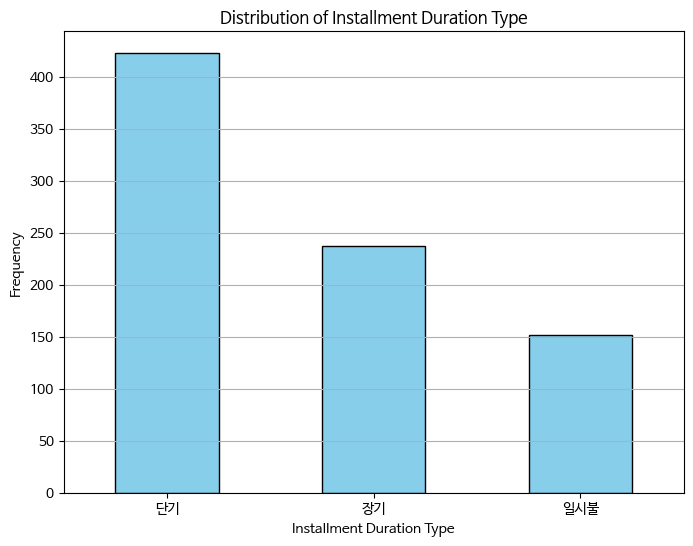

In [26]:
# installment_duration_type 컬럼의 분포를 막대그래프로 시각화
plt.figure(figsize=(8, 6))
data_cleaned['installment_duration_type'].value_counts().plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Distribution of Installment Duration Type')
plt.xlabel('Installment Duration Type')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

---

## 4. 데이터 저장

💬 **Chat Prompt**


> 현재까지 만들어진 데이터를 다운로드 받을 수 있는 링크를 만들어줘


🤖 **GPT 출력: Message**

```
데이터를 다운로드할 수 있는 링크를 생성했습니다. 아래 링크를 클릭하여 데이터를 다운로드할 수 있습니다:

다운로드 링크 ￼
```
